# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 8<span>

### Esercizio 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code).

In questa prima parte dell'esercitazione ho sviluppato interamente un codice per il campionamento di una densità di probabilità ottenuta dal modulo quadro della funzione d'onda $\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}$. Il modo con cui è stato eseguito il campionamento è attraverso il solito Algoritmo di Metropolis. Incominciando da una certa conformazione iniziale, univocamente caratterizzata da tre componenti di un vettore, si propone una nuova conformazione attraverso una probabilità tentativa uniforme $T(x|y)$. Per ognuna delle tre componenti del vettore viene estratto uniformemente un numero $r \in [-\delta, \delta]$ e si incrementa ogni coordinata con il $\delta$ rispettivo estratto. Data questa nuova conformazione, viene accettata con una probabilità pari a $A(x|y)=min(1, e^{-\beta(E'-E)})$. La grande forza di questo algoritmo risiede nel fatto che, avendo nella probabilità di accettazione il rapporto dei pesi di Boltzmann delle due conformazioni, la funzione di partizione $Z$ (di cui non si riesce a conoscere una scrittura esatta) si semplifica, non rientrando quindi nel campionamento della funzione d'onda.

### Esercizio 08.2

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential: $V(x) = x^4 - \frac{5}{2}x^2$.
Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$.

- As usual, show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture *of the sampled* $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

Il problema di Schroedinger con Hamiltonianan $H= T+V $ con $V(x)=x^4-\frac{5}{2}x^2$. Non è analiticamente risolvibile. Pertanto, per cercare di ottenere il Ground State di questo sistema, si utilizza il principio variazionale.

<span style="color:red">Il principio variazionale</span> ci dice che data una hamiltoniana $H$, per qualunque funzione d'onda trial $\Psi_t$, l'energia calcolata sullo stato $\Psi_t$ sarà maggiore o uguale all'energia di ground state: 

$$E_T=\frac{\langle \Psi_T|H|\Psi_T\rangle}{\langle \Psi_T|\Psi_T\rangle} \geq E_0=\frac{\langle \Psi_0|H|\Psi_0\rangle}{\langle \Psi_0|\Psi_0\rangle}$$

con appunto $\Psi_0$ funzione d'onda del Ground State. Pertanto, in questo codice Monte Carlo Variazionale, ho ricercato il ground state utilizzando come funzione trial la funzione d'onda $\Psi_T^{\sigma,\mu}(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}$. Sono andato a variare i valori della coppia $(\sigma, \mu)$ per cercare di trovare quale coppia di parametri minimizzasse l'energia. Il range in cui ho fatto variare $\sigma$ è $ \sigma \in[0.6,0.65]$, mentre il range in cui ho fatto variare $\mu$ è $\mu \in[0.78,0.83]$. Ognuna di queste due variabili, viene studiata con un passo pari a 0.001. Anche se computazionalmente è abbastanza oneroso studiare $\sigma$ e $\mu$ con un passo così piccolo, ho fatto questa scelta per cercare di trovare i migliori parametri con cui approssimare il Ground State di questo sistema monodimensionale. Invece, i range in cui ho fatto variare questi due parametri, sono stati scelti subordinamente a un primo campionamento più *coarse grained*.

Durante la variazione dei parametri di $\sigma$ e di $\mu$, dopo una prima equilibrazione sono stati eseguiti $10^5$ campionamenti suddivisi in 100 blocchi in cui si misura l'energia di quella data funzione traial. Al termine dei 100 blocchi viene confrontata l'energia misurata su quella funzione d'onda con l'energia salvata nella variabile `minus` che fino a quel momento era la minore energia osservata. Se l'energia della $\Psi_T$ risulta minore dell'energia `minus`, allora l'energia minore viene rimpiazzata ponendo `minus`$=E_T$, dove $E_T$ è l'energia appena misurata sulla funzione di trial. In quel caso, vengono anche salvati i valori di $\sigma$ e $\mu$ su due variabili di nome `s_min` ed `m_min` così da potersi ricordare al termine del ciclo, quali sono i valori di $\sigma$ e $\mu$ che minimizzano variazionalmente l'energia.


Quando parlo di calcolare l'energia del sistema sulla funzione d'onda $\Psi_T$, si intende calcolare il valor medio dell'hamiltoniana $H \cdot \Psi_T = \left[-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right] \Psi_T(x)$ dove $x$ è estratto con probabilità data dal modulo quadro della funzione d'onda stessa:

$$E_T=\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}  \simeq \sum \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}\text{    dove x è campionato secondo  } \rho(x)= \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2}$$

$\rho(x)$ è appunto campionata con l'algoritmo di Metropolis.


Una volta ottenuti i valori di $\sigma$ e $\mu$ ottimali per avere il minor valore possibile dell'energia, ho eseguito nuovamente la simulazione su quella funzione d'onda trial $\Psi_T^{\sigma_{min},\mu_{min}}(x)$, e ho calcolato il valore dell'energia su questo minimo variazionale andando ad analizzare i dati ottenuti tramite il metodo del Data Blocking. Ho eseguito $10^5$ campionamenti suddivisi in 100 blocchi. Ho da ultimo rappresentato la funzione d'onda variazionale ottenuta con il mio codice. Questa funzione d'onda è stata ottenuta dividendo l'intervallo $[-2.75,2.75]$ in 500 intervalli più piccoli e di equa grandezza. Ad ogni campionamento dell'algoritmo di Metropolis, viene valutata la coordinata $x$ e si riempie di conseguenza l'istogramma creato. Al termine della simulazione, l'istogramma viene normalizzato e da ultimo stamato in un file di output.

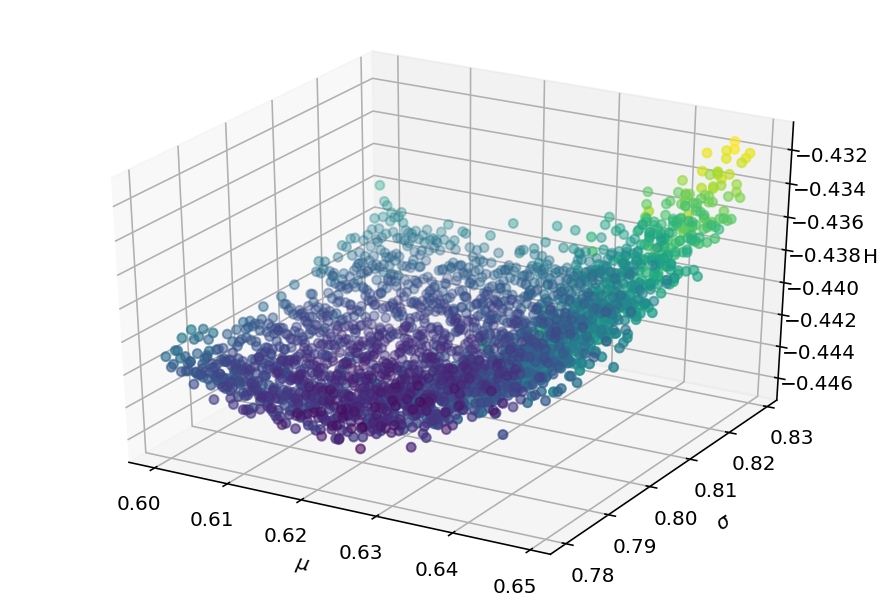

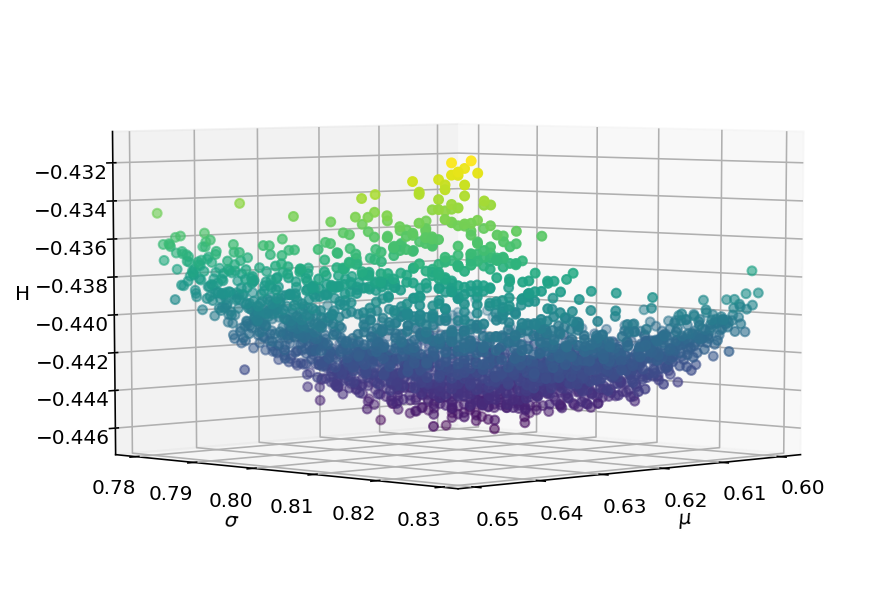

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
%config InlineBackend.figure_format = 'retina'
from mpl_toolkits.mplot3d import Axes3D



(X, Y, Z) = np.loadtxt('./08.1/Best_Psi.txt', unpack=True, delimiter=' ', usecols=(0,1,2))
fig=plt.figure(1)
fig2=plt.figure(2)
ax = Axes3D(fig)
ax2 = Axes3D(fig2)
ax.scatter(X,Y,Z, c=Z)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('H')
ax2.scatter(X,Y,Z, c=Z)
ax2.view_init(5, 45)
ax2.set_xlabel('$\mu$')
ax2.set_ylabel('$\sigma$')
ax2.set_zlabel('H')
ax2.grid(True)


In [2]:
print("=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")
print('E_min variazionale = ' +str(min(Z)) +";    Sigma = "+ str(X[np.argmin(Z)]) + ";   Mu = " + str(Y[np.argmin(Z)]))
print("=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=")

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
E_min variazionale = -0.446326;    Sigma = 0.617;   Mu = 0.795
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=


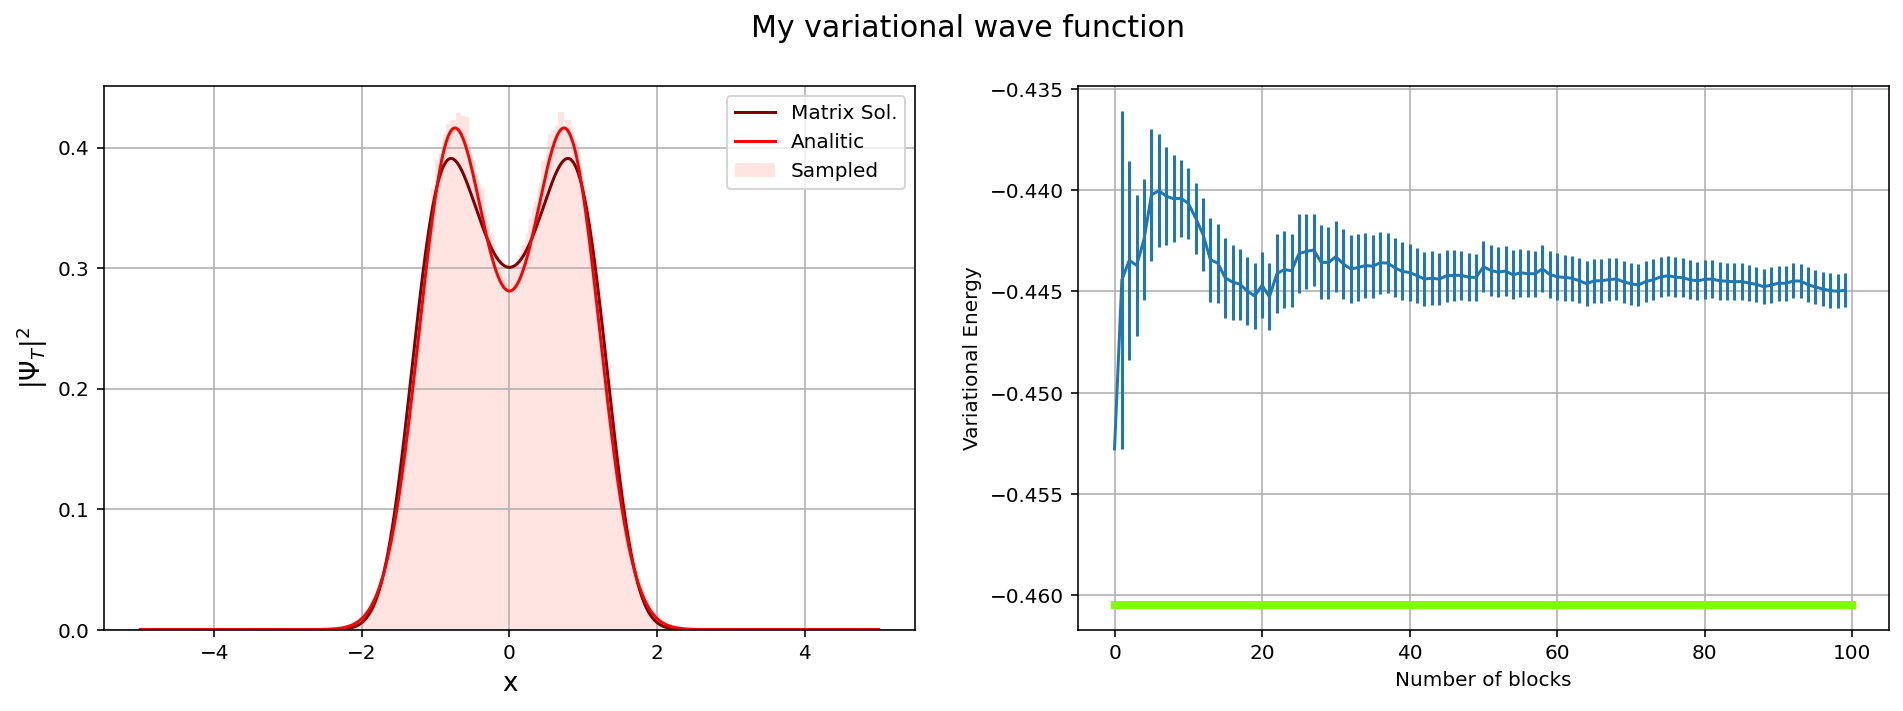

In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2

def Psi(x, mu, sigma):
    return np.exp(-(x-mu)*(x-mu)/(2.*sigma*sigma))+np.exp(-(x+mu)*(x+mu)/(2.*sigma*sigma))

def Psi_Sq(x, mu, sigma):
    return Psi(x, mu, sigma)*Psi(x, mu, sigma)



mu = 0.8064
sigma = 0.6175
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
norm = 2.*np.sqrt(math.pi)*sigma*(1. + np.exp(-mu*mu/(sigma*sigma)))


(x_isto, psi_isto) = np.loadtxt('./08.1/Ground_state_eigenstate.txt', unpack=True, delimiter=' ', usecols=(0,1))
(n, ene, err, run) = np.loadtxt('./08.1/Ground_state_eigenvalue.txt', unpack=True, delimiter=' ', usecols=(0,1,3,4))

fig, axs = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('My variational wave function', fontsize=15)

axs[0].bar(x_isto,psi_isto,align='center', width=0.08, color='mistyrose',label="Sampled")
axs[0].plot(x,(psi[0])**2, color = 'maroon', label='Matrix Sol.')
axs[0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='red', label = 'Analitic')
axs[0].set_xlabel('x',fontsize=13)
axs[0].set_ylabel(r'$|\Psi_T|^2$',fontsize=13)
axs[0].legend()

axs[1].plot([0,100], [-0.46046587969271563,-0.46046587969271563], color='chartreuse', label='Exact value',linewidth=4)
axs[1].errorbar(n, ene, yerr=err)
axs[1].set_xlabel('Number of blocks')
axs[1].set_ylabel('Variational Energy')

for ax in axs.flat:
    ax.grid(True)

Dai grafici appena mostrati possiamo fare le seguenti affermazioni:
1. Innanzitutto osservando la forma della funzione d'onda da me campionata e confrontandola con la funzione d'onda ottenuta analiticamente utilizzando i parametri $\sigma_{min}$ e $\mu_{min}$ , e con la soluzione matriciale del problema di Schroedingher, posso affermare che il mio comportamento avviene correttamente. Anche se nella zona centrale si ha una leggera discrepanza tra la mia funzione d'onda e la soluzione matriciale mi ritengo soddisfatto del risultato.
2. Osservando l'energia di questa funzione d'onda osservo che, anche se ho utilizzato $\sigma_{min}$ e $\mu_{min}$ sono ancora abbastanza lontano dal valore dell'energia di Ground State. Tuttavia questo non mi sorprende. Infatti all'inizio della mia soluzione sono state fatte delle grosse assunzioni. Infatti ho scelto come funzione d'onda trial $\Psi_T$ una funzione d'onda data dalla somma di due gaussiane, ma non c'è niente che mi garantisce che la forma sia effettivamente quella. Inoltre il metodo variazionale, non mi consente di determinare la funzione d'onda di ground state, ma mi permette di ottenere tra delle funzioni d'onda tentative quella che approssima meglio il ground state del sistema. Pertanto anche se non ho raggiunto esattamente l'energia minima, mi reputo soddisfatto del risultato ottenuto.

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

Compare your results with those obtained with your VMC code. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?
Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.

Il codice fornito simula lo stesso sistema appena presentato. L'obiettivo del codice è quello di campionare la funzione d'onda del ground state del sistema.

Il metodo <span style="color:red">PIGS</span> (Path Integral Ground State) è un metodo esatto che lavora a temperatura nulla e sfrutta l'evoluzione temporale per tempi immaginari. Per tempi immaginari grandi (al limite infinito), partendo da una qualunque funziona d'onda è possibile ottenere la funzione d'onda di Ground State del sistema. Il risultato che si ottiene è che $N$ particelle quantistiche interagenti possono essere approssimate con $N$ polimeri ad anelli aperti, che interagiscono in modo particolare tra di loro (con la stessa interazione delle particelle quantistiche) e con i punti del polimero stesso che interagiscono tramite potenziale armonico.

Il metodo <span style="color:red">PIMC</span> (Path Integral Monte Carlo) è un metodo Monte Carlo che simula il sistema quantistico di $N$ particelle quantistiche interagenti attraverso il campionamento di $N$ polimeri ad anelli chiusi, che interagiscono tra loro in modo particolare con la stessa interazione delle particelle quantistiche, e con i punti del polimero stesso che interagiscono attravero potenziale armonico.


La grande approssimazione su cui lavorano i codici PIMC e PIGS è l'approssimazione di Trotter per cui:

$$e^{-\tau \hat{H}}=(e^{-\frac{\tau}{M}\hat{H}})^M$$

Questa relazione infatti sarebbe vera nel limite di $M \rightarrow \infty$. Invece questo tipo di approssimazione trascura un errore proporzionale al commutatore tra energia cinetica e potenziale $[T,V]$.

Prima di eseguire il codice, è stato necessario aggiungere la forma del potenziale di interazione delle due funzioni d'onda da studiare.

### PIGS (T=0)

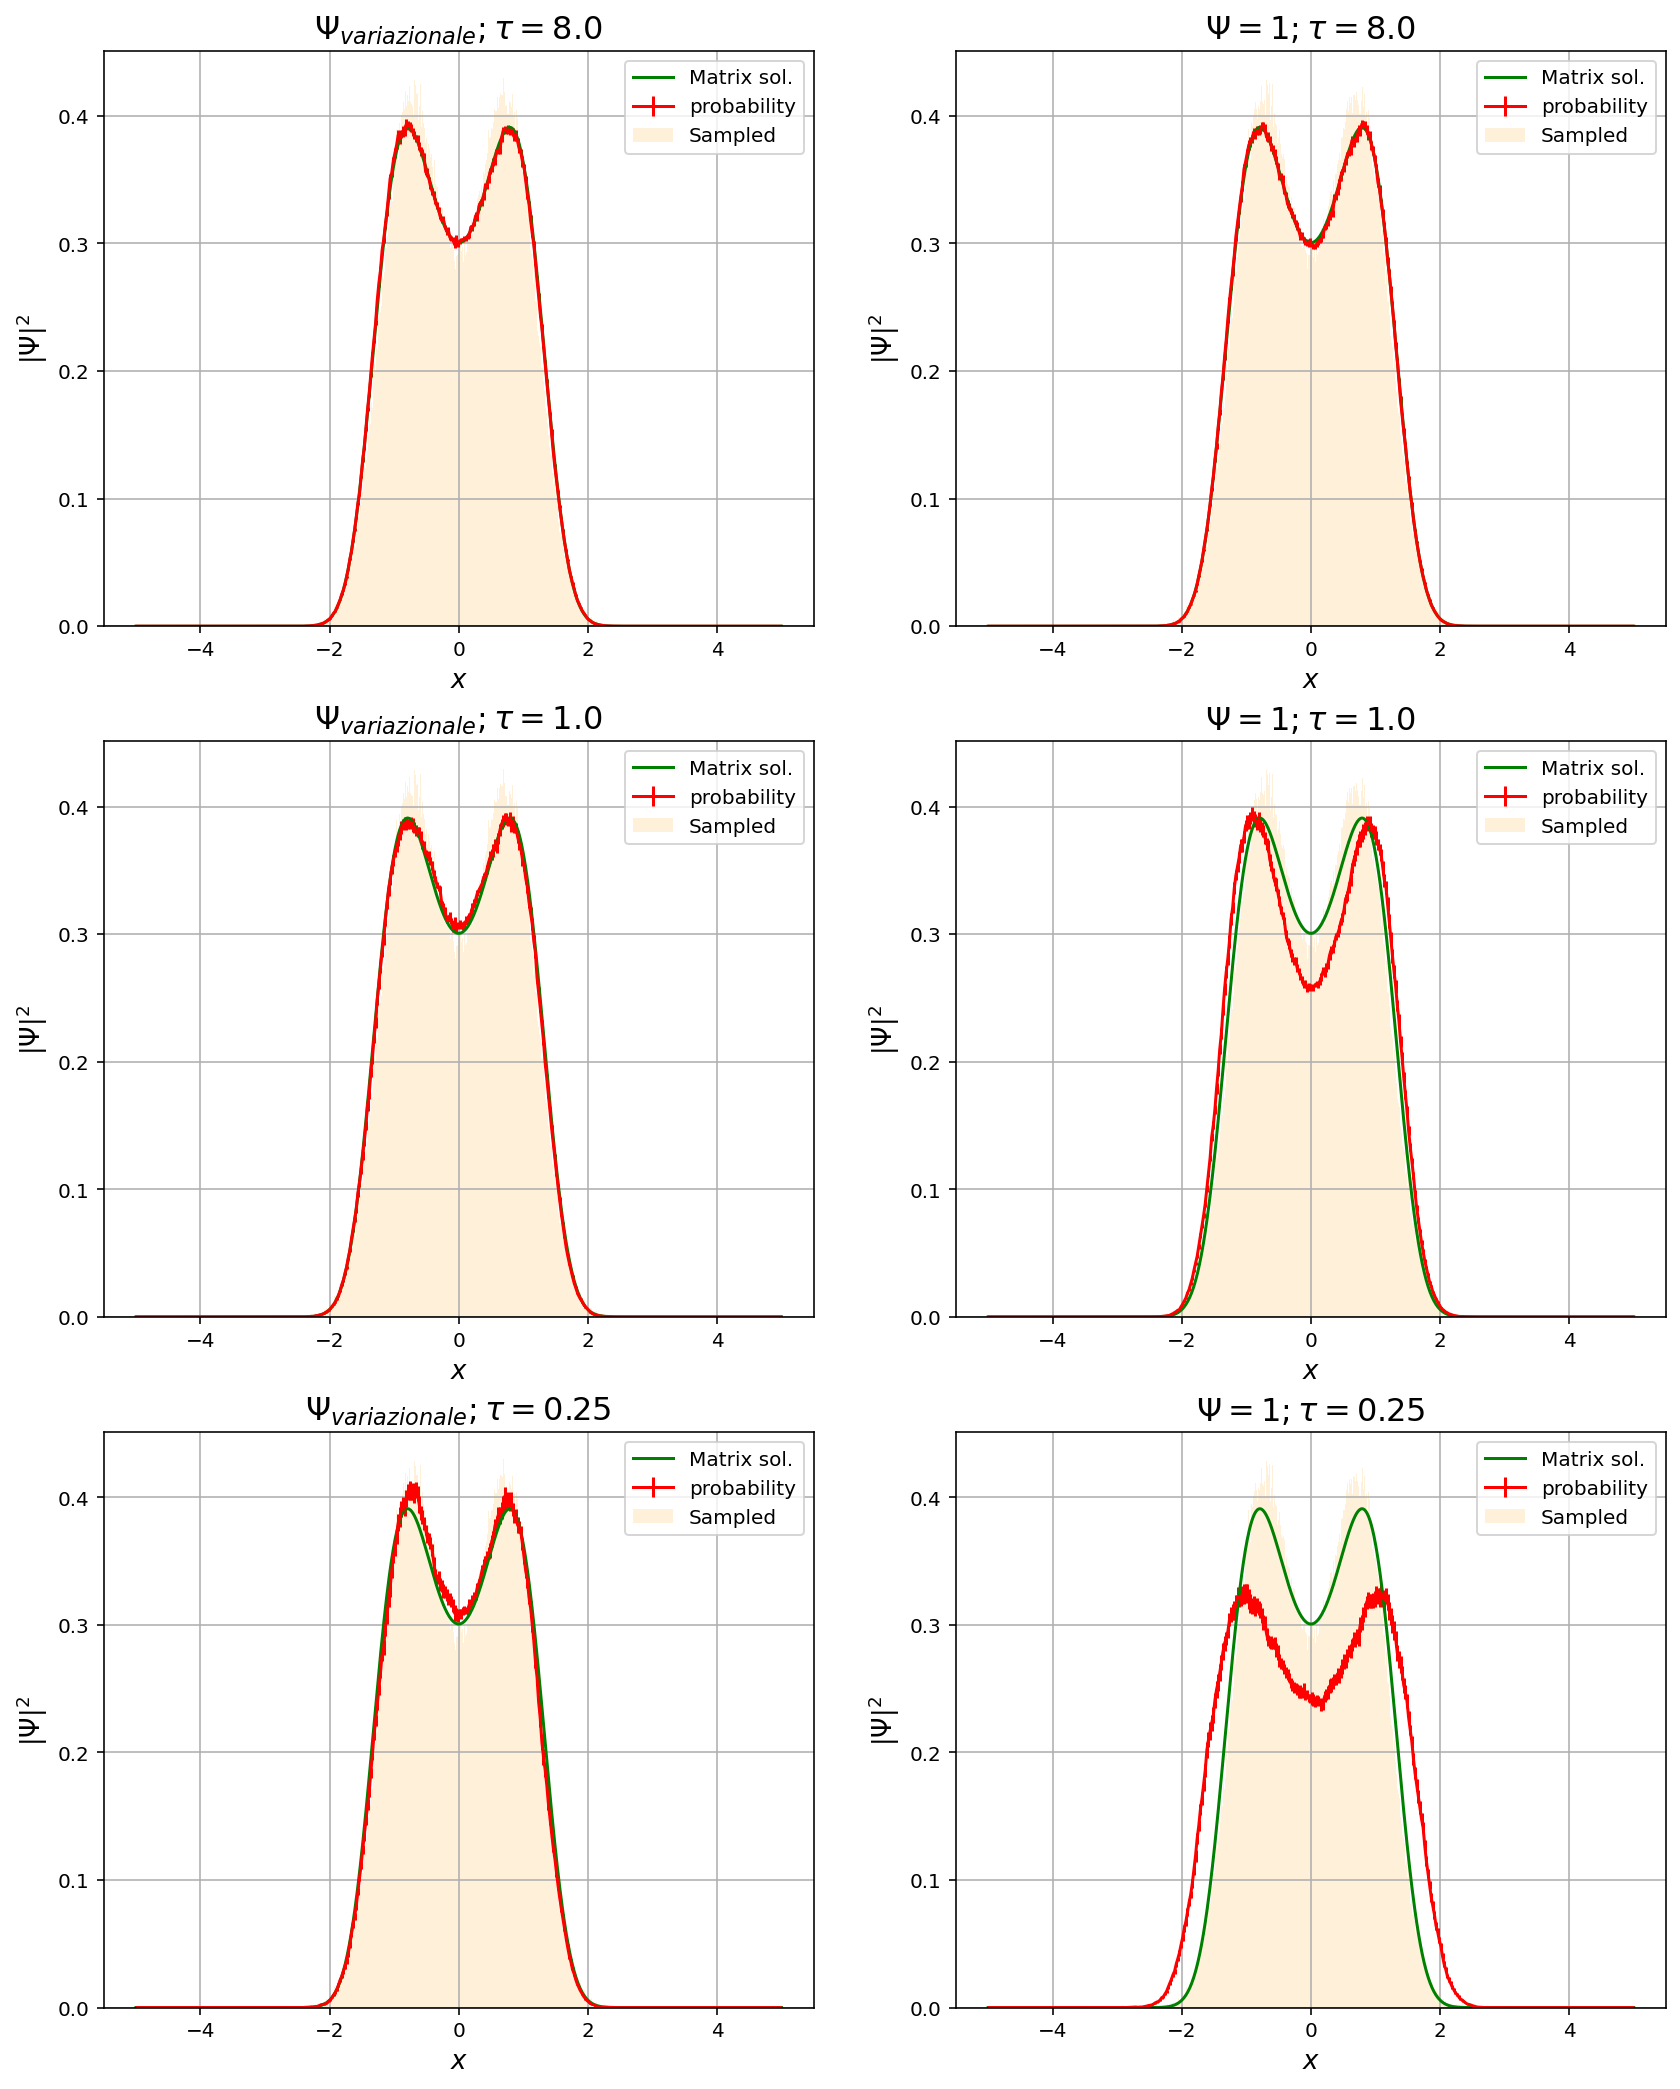

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(14,18))

(my, psi_my) = np.loadtxt('./08.1/Ground_state_eigenstate.txt', unpack=True, delimiter=' ', usecols=(0,1))
count=0
bin_size=my[1]-my[0]
for i in range(len(psi_my)):
    count+=psi_my[i]*bin_size

#proiezione su Psi variazionale tempo = 8.0
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.08gs', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0,0].set_title(r'$\Psi_{variazionale} ;  \tau=8.0$', fontsize=16)
axs[0,0].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[0,0].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
axs[0,0].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
#axs[0,0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[0,0].grid()

#proiezione su Psi variazionale tempo = 1.0
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.01gs', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1,0].set_title(r'$\Psi_{variazionale} ;  \tau=1.0$', fontsize=16)
axs[1,0].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[1,0].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
axs[1,0].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
#axs[1,0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[1,0].grid()

#proiezione su Psi variazionale tempo = 0.25
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.0025gs', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[2,0].set_title(r'$\Psi_{variazionale} ;  \tau=0.25$', fontsize=16)
axs[2,0].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[2,0].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
axs[2,0].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
#axs[2,0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[2,0].grid()

#proiezione su Psi=1 per tempo imm = 8.0
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.08cost', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0,1].set_title(r'$\Psi=1 ;  \tau=8.0$', fontsize=16)
axs[0,1].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[0,1].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
axs[0,1].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
#axs[0,1].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[0,1].grid()

#proiezione su Psi=1 per tempo imm = 1.0
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.01cost', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1,1].set_title(r'$\Psi=1 ;  \tau=1.0$', fontsize=16)
axs[1,1].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[1,1].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
#axs[1,1].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[1,1].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
axs[1,1].grid()

#proiezione su Psi=1 per tempo imm = 0.25
(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.0025cost', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[2,1].set_title(r'$\Psi=1 ;  \tau=0.25$', fontsize=16)
axs[2,1].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[2,1].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')
axs[2,1].plot(x,(psi[0])**2, color='green', label = 'Matrix sol.')
#axs[2,1].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[2,1].grid()

for ax in axs.flat:
    ax.set_xlabel('$x$', fontsize=13)
    ax.set_ylabel(r'$|\Psi|^2$', fontsize=13)
    ax.legend()

Come è possibile vedere dai grafici soprastanti, il metodo PIGS è molto efficiente. Nei grafici della colonna a sinistra, ho mostrato le densità di probabilità ottenute proiettando sulla funzione d'onda variazionale $\Psi_T$ ottenuta nei precedenti punti dell'esercizio. Nel primo grafico della colonna a sinistra ho propagato con un tempo immaginario di $\tau=8.0$; mentre nel secondo e terzo grafico, rispettivamente con $\tau=1.0$ e $\tau=0.25$. È evidente dai grafici che a prescindere da quale tempo immaginario utilizzo, se parto dalla funzione d'onda variazionale $\Psi_T$ i risultati sono tutti perfettamente in accordo con la soluzione matriciale e con la funzione d'onda campionata col mio algoritmo di Metropolis. Questo accade perchè partendo da uno stato molto prossimo allo stato di Ground State (come effettivamente è $\Psi_T$), servirà pochissimo tempo per il propagatore per raggiungere lo stato di ground state esatto: in questo caso anche $\tau=1.0$ è sufficiente con il metodo PIGS.

Discorso diverso quando invece utilizzo la funzione d'onda costante per la proiezione. In questo caso infatti, è evidente come $\tau=8.0$ vada benissimo per raggiungere la funzione d'onda di Ground State, mentre $\tau=1.0$ non risulta essere sufficiente. Infatti come è possibile notare dal grafico, la probabilità ottenuta con PIGS proiettando su $\Psi=1$ con $\tau=1.0$, si discosta non di poco dalla probabilità ottenuta nel codice VMC. Questo significa che il tempo fornito non è sufficiente per propagare la funzione d'onda trial $\Psi_T$ per farla giungere sul ground state. Questo fenomeno è evidente anche dai prossimi grafici che andrò a mostrare.

<span style="color:red">N.B.</span>: è da notare che la probabilità ottenuta con PIGS è più vicina alla soluzione matriciale di quanto fosse la probabilità ottenuta con il mio algoritmo Monte Carlo Variazionale.

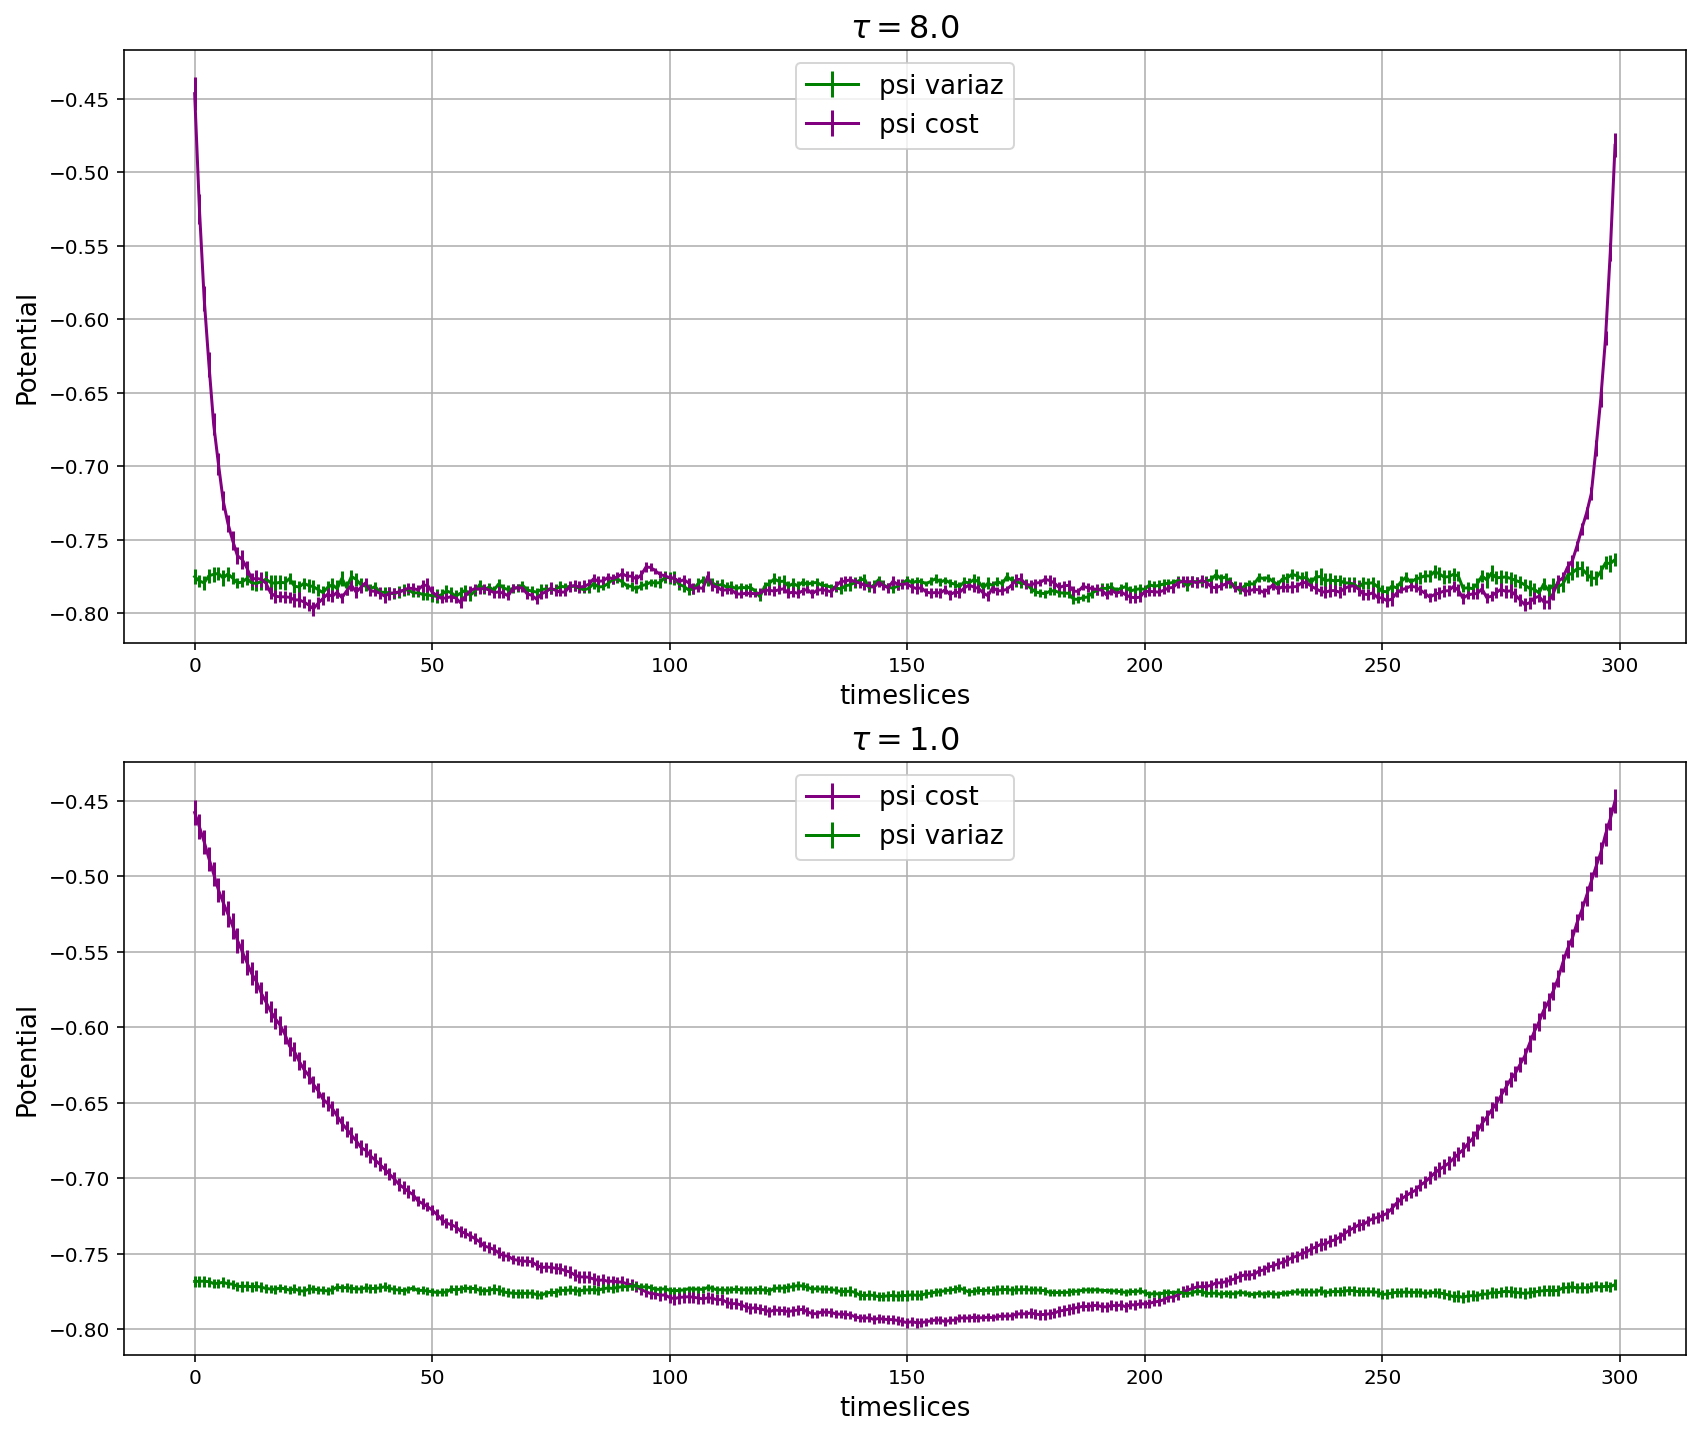

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(14,12))

(x_pot, pot, error_pot) = np.loadtxt('./QMC_1D/potential.08gs', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0].set_title(r'$\tau=8.0$', fontsize=16)
axs[0].errorbar(x_pot,pot,yerr=error_pot,c='green', errorevery=1, label='psi variaz',mec='firebrick')
(x_pot, pot, error_pot) = np.loadtxt('./QMC_1D/potential.08cost', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0].errorbar(x_pot,pot,yerr=error_pot,c='purple', errorevery=1, label='psi cost',mec='firebrick')

(x_pot, pot, error_pot) = np.loadtxt('./QMC_1D/potential.01cost', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1].set_title(r'$\tau=1.0$', fontsize=16)
axs[1].errorbar(x_pot,pot,yerr=error_pot,c='purple', errorevery=1, label='psi cost',mec='firebrick')
(x_pot, pot, error_pot) = np.loadtxt('./QMC_1D/potential.01gs', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1].errorbar(x_pot,pot,yerr=error_pot,c='green', errorevery=1, label='psi variaz',mec='firebrick')


for ax in axs.flat:
    ax.set_ylabel('Potential', fontsize=13)
    ax.set_xlabel('timeslices', fontsize=13)
    ax.legend(fontsize=13)
    ax.grid()

Nei grafici soprastanti, ho plottato l'andamento delle due energie potenziali in funzione delle timeslices. Ho infatti diviso i polimeri in 300 timeslices. Le timeslice a 0 e 300 sono le due più esterni su cui ho il bra e il ket. Questi Bra e Ket saranno proprio la funzione d'onda su cui sto proiettando. Data qualunque funzione d'onda trial, grazie al propagatore per tempi immaginari, la funzione va verso il Ground State. Ho rappresentato in viola il potenziale utilizzando la $\Psi=1$, mentre in verde il potenziale utilizzando $\Psi_T$ ottenuta in precedenza. Dovrò andare a verificare i valori del potenziale a metà delle timeslices: la posizione dove sia il Bra che il Ket sono massimamente propagati. Se valutassi il potenziale a uno dei due estremi, avrei uno dei due non propagato affatto. 

Nel primo grafico ho propagato le funzioni d'onda con un tempo immaginario pari a $\tau=8.0$. In questo caso è evidente che sia utilizzare una funzione d'onda costante che la funzione d'onda variazionale va bene per i miei scopi dovendo valutare l'energia a 150 timeslices (come dicevo anche appena sopra). Tuttavia, si può osservare anche quì come partire dalla funzione d'onda variazionale permetta di ridurre le timeslices, proprio per il fatto che la funzione d'onda variazionale è più prossima al Ground State di quanto è la funzione d'onda costante.

Nel secondo grafico ho riportato i due stessi potenziali, ma propagando le funzioni inziali con tempo immaginario di $\tau=1.0$. In questo caso il tempo immaginario di propagazione è più piccolo e infatti la $\Psi=1$ non va più bene per i miei scopi.

### PIMC (T>0)

Con il codice PIMC mi sono concentrato solo sulla funzione variazionale trovata col mio campionamento Monte Carlo variazionale. Aumentando la temperatura quello che si può osservare che peggiora la qualità della stima della probabilità data dal modulo quadro di $\Psi_T$: la funzione d'onda non si sovrappone più correttamente ai risultati numerici e ai risultati ottenuti nei precedenti punti. Il motivo di questo comportamente è che all'aumentare della temperatura, si vanno a popolare per eccitazione termica alcuni stati eccitati prima inaccessibili al sistema. I comportamenti che si osservano sono due:
1. L'appiattimento della probabilità in un intorno di $x=0$ in accordo con la forma degli stati eccitati del sistema
2. Si osserva l'allargamento della probabilità a valori di $x$ dove precedentemente la probabilità era nulla. Anche in questo caso, questo fenomeno è coerente col fatto che aumentando l'energia, risalgo le pareti del potenziale $V(x)$ osservano delle configurazioni di $x$ che precedentemente con energia minore non si potevano osservare.

Per avvalere ancora di più queste osservazioni ho eseguito il metodo PIMC con temperature pari a $T=1.25, 5,10,30$. Ho riportato nei grafici sottostanti i risultati ottenuti.

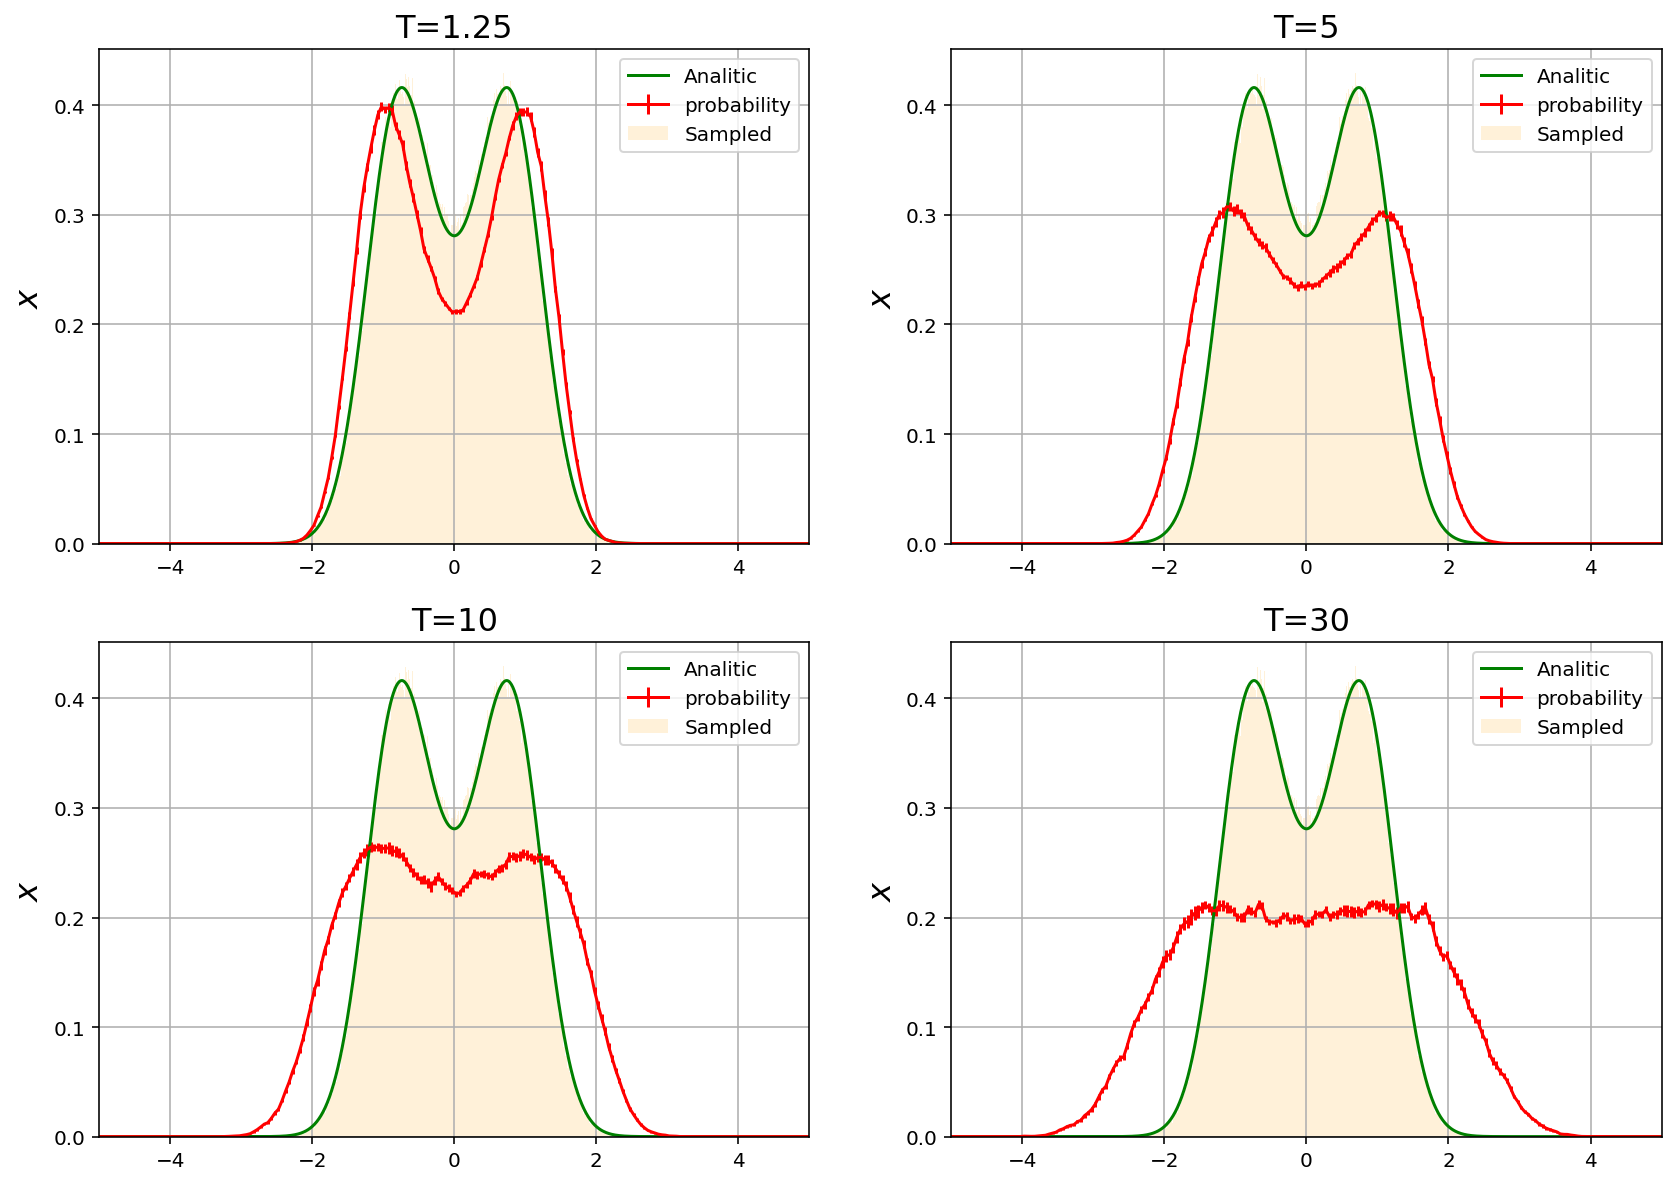

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.pimc8gs1', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0,0].set_title("T=1.25", fontsize=16)
axs[0,0].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[0,0].set_ylabel('$x$', fontsize=16)
axs[0,0].axis(xmin=-5,xmax=5)
axs[0,0].grid()
axs[0,0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[0,0].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')

(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.pimc8gs5', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[0,1].set_title("T=5", fontsize=16)
axs[0,1].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[0,1].set_ylabel('$x$', fontsize=16)
axs[0,1].axis(xmin=-5,xmax=5)
axs[0,1].grid()
axs[0,1].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[0,1].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')

(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.pimc8gs10', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1,0].set_title("T=10", fontsize=16)
axs[1,0].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[1,0].set_ylabel('$x$', fontsize=16)
axs[1,0].axis(xmin=-5,xmax=5)
axs[1,0].grid()
axs[1,0].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[1,0].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')

(x_prob, prob, error_prob) = np.loadtxt('./QMC_1D/probability.pimc8gs30', unpack=True, delimiter=' ', usecols=(0,1,2))
axs[1,1].set_title("T=30", fontsize=16)
axs[1,1].errorbar(x_prob,prob,yerr=error_prob,c='red', label='probability')
axs[1,1].set_ylabel('$x$', fontsize=16)
axs[1,1].axis(xmin=-5,xmax=5)
axs[1,1].grid()
axs[1,1].plot(x, Psi_Sq(x, mu, sigma)/norm, color='green', label = 'Analitic')
axs[1,1].bar(my,psi_my, width=0.011, color='moccasin', alpha=0.5, label = 'Sampled')

for ax in axs.flat:
    ax.legend()